In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/HeightWeight.csv')

In [4]:
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [6]:
df.shape

(15, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [9]:
df.dtypes

Height    float64
Weight    float64
dtype: object

In [10]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

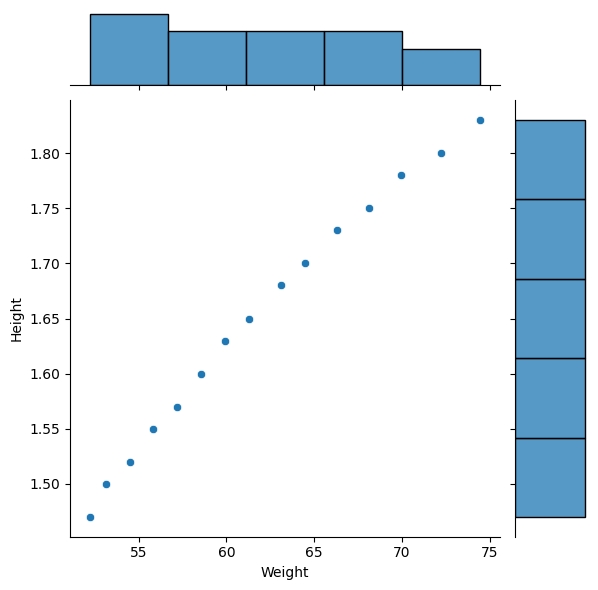

In [12]:
sns.jointplot(x='Weight',y='Height',data=df)

<ipython-input-13-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

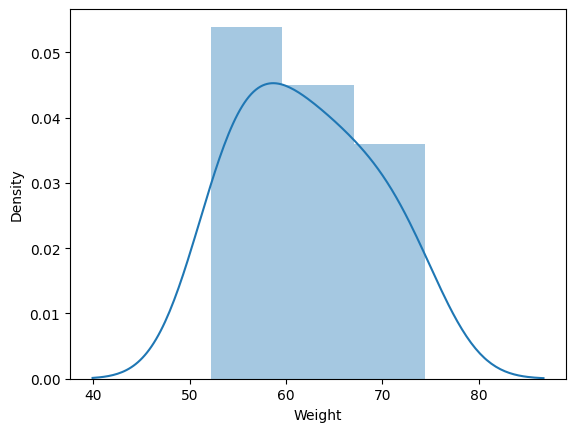

In [13]:
sns.distplot(df['Weight'])

<Axes: xlabel='Height', ylabel='count'>

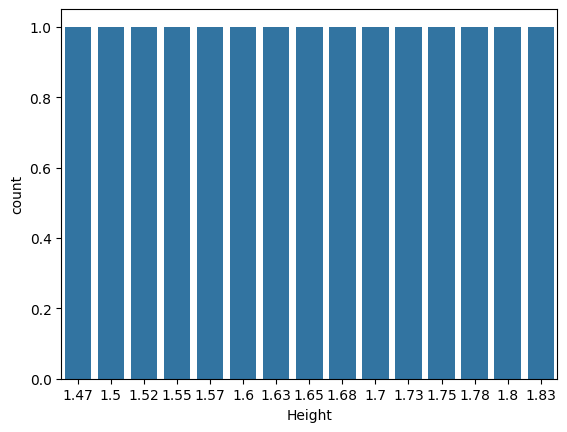

In [18]:
sns.countplot(x='Height',data=df)

<Axes: xlabel='Height', ylabel='Weight'>

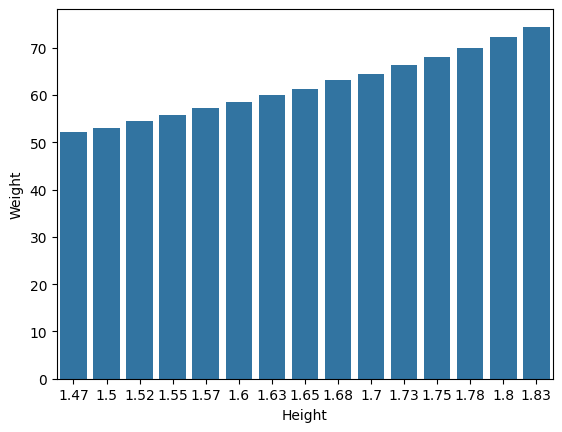

In [19]:
sns.barplot(x='Height',y='Weight',data=df)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
df.iloc[:,0:-1]=sc.fit_transform(df.iloc[:,0:-1])

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
y

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64

In [25]:
x

,Height
0,-1.637051
1,-1.365216
2,-1.183993
3,-0.912158
4,-0.730934
5,-0.459099
6,-0.187264
7,-0.006041
8,0.265794
9,0.447018


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [28]:
from sklearn.linear_model import LinearRegression

In [32]:
le=LinearRegression()

In [34]:
le.fit(x_train,y_train)

LinearRegression()

In [35]:
le.coef_

array([6.96785893])

In [36]:
y_pred=le.predict(x_test)

In [38]:
y_pred

array([62.04671309, 67.09766945, 56.99575673, 50.68206128, 58.88986537])

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
rmse = mean_squared_error(y_test,y_pred,squared=False)

In [41]:
rmse

0.8625339332479264

In [42]:
r2_score(y_test,y_pred)

0.965464772121504